In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.manifold import TSNE
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 16,9

In [2]:
data = pd.read_csv('processed.csv')

In [3]:
data.head()

,00,000,05,06,07,07021992,07022020,08022020,10,100,...,являюсь,являются,явно,яд,якобы,январе,января,ященко,ящик,ящика
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.104257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190169,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
to_drop = [] # выкидываем столбцы с числами
for i in range(107):
    to_drop.append(data.columns[i])
data.drop(to_drop, axis=1, inplace=True)

In [5]:
# выкидываем столбцы с длинной слова <= 2
to_drop = []
for i, val in enumerate(data.columns):
    if len(val) <= 2:
        to_drop.append(data.columns[i])
data.drop(to_drop, axis=1, inplace=True)

In [6]:
data.head()

,alt74ru,apple,boxberry,galaxy,hdd,hoff,ozon,pimpay,samsung,vaptekeru,...,является,являюсь,являются,явно,якобы,январе,января,ященко,ящик,ящика
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.104257,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


На сайте Роспотребнадзора есть 11 категорий обращений, следовательно, будем разбивать данные на 11 кластеров.

Если бы у нас не было заданных категорий, то можно было бы использовать, например, кросс-валидацию (https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).

In [7]:
#topics = ['Розничная торговля', 'Общественное питание', 'Бытовое обслуживание', 'Жилищно-коммунальные услуги',
#          'Медицинские услуги', 'Транспортные услуги', 'Образовательные услуги', 'Финансовые услуги',
#          'Услуги связи', 'Туристские услуги', 'Прочие виды деятельности']

In [8]:
lda = LDA(n_components=11, random_state=42, n_jobs=-1)
lda.fit(data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=11, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [9]:
words = data.columns.values.tolist()
for i, topic in enumerate(lda.components_):
    print("\nКатегория №%d:" % (i+1))
    print(" ".join([words[j] for j in topic.argsort()[:-30 - 1:-1]]))


Категория №1:
оказать абонемент мед содействие туалет отдал техника сезон качественный текст цвет прилагается ознакомиться щенка проспект кабинета украшены колонки согаз пальто году весь муж камеру подошел личного сообщения обращении приходит книга

Категория №2:
товар магазине вернуть товара заказ магазин это деньги день прошу ооо продавец здравствуйте интернет добрый магазина дней возврат рублей адресу сайте адрес претензию делать стоимость чек сделать заказа сумму телефон

Категория №3:
магазинов ирина пива покупатель камеру принтер закон пальто наличие продавать перечень ценники экспертиза сертификаты выдал расположен году условие нужен поскольку платим предприятия камень добрый клиентом пояснили руками технологии меняют семья

Категория №4:
помещение монитор качестве возвращает лекарства предоставлен неоднократно опасности невозможно мусор уплаченных потребителю стекло аптеки плохо счетчик такого устраивает поверхность меньше предмет поняли упаковке данное стол качество вылет нар

In [10]:
tsne = TSNE(n_components=2, init='pca', random_state=42, n_jobs=-1)
to_plot = tsne.fit_transform(data)

In [11]:
cat = []
for i in range(len(data)):
    cat.append(np.argmax(lda.transform(data.iloc[[i]]))+1)

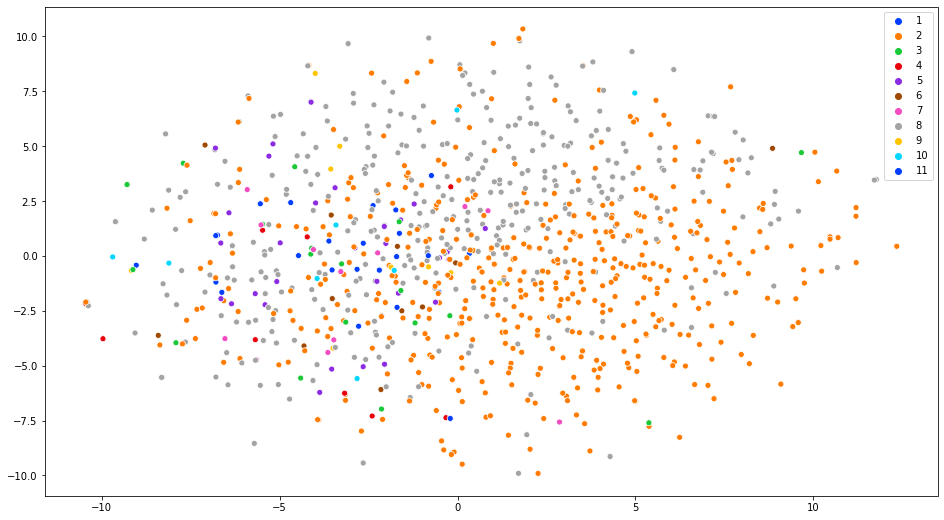

In [12]:
sns.scatterplot(to_plot[:,0], to_plot[:,1], cat, palette=sns.color_palette('bright', len(np.unique(cat))),
                legend='full')

Слова в категориях довольно сильно пересекаются, а LDA выдаёт вероятности, поэтому график выглядит так себе.